* Importing Libraries
* Importing Dataset
* Importing Dataset
* Convert Data to correct datatypes
* Missing Values
* Visualization
* Outlier Detection
* Feature Engineering and selection
* Remove multi-collinearity
* Separate train and test features 

# Importing Libraries

In [260]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable as stb
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
pd.set_option('display.max_rows', None)
import datetime as dt
from sklearn.model_selection import train_test_split

# Importing Dataset

In [261]:
df=pd.read_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv")

# Exploring Dataset

In [262]:
df.head()

Order  Property Id                                 Property Name  \
0      1        13286                                       201/205   
1      2        28400                    NYP Columbia (West Campus)   
2      3      4778226                                 MSCHoNY North   
3      4      4778267  Herbert Irving Pavilion & Millstein Hospital   
4      5      4778288                               Neuro Institute   

  Parent Property Id        Parent Property Name BBL - 10 digits  \
0              13286                     201/205      1013160001   
1              28400  NYP Columbia (West Campus)      1021380040   
2              28400  NYP Columbia (West Campus)      1021380030   
3              28400  NYP Columbia (West Campus)      1021390001   
4              28400  NYP Columbia (West Campus)      1021390085   

  NYC Borough, Block and Lot (BBL) self-reported  \
0                                     1013160001   
1                                   1-02138-0040   
2                                   1-02138-0030   
3                                   1-02139-0001   
4                                   1-02139-0085   

            NYC Building Identification Number (BIN)  \
0                                            1037549   
1  1084198; 1084387;1084385; 1084386; 1084388; 10...   
2                                            1063380   
3                                   1087281; 1076746   
4                                            1063403   

  Address 1 (self-reported)                Address 2  ...  \
0  201/205  East  42nd  st.            Not Available  ...   
1          622 168th Street            Not Available  ...   
2             3975 Broadway            Not Available  ...   
3   161 Fort Washington Ave  177 Fort Washington Ave  ...   
4     710 West 168th Street            Not Available  ...   

  Source EUI (kBtu/ft²)            Release Date Water Required?  \
0                 619.4  05/01/2017 05:32:03 PM              No   
1                 404.3  04/27/2017 11:23:27 AM              No   
2         Not Available  04/27/2017 11:23:27 AM              No   
3         Not Available  04/27/2017 11:23:27 AM              No   
4         Not Available  04/27/2017 11:23:27 AM              No   

  DOF Benchmarking Submission Status   Latitude  Longitude Community Board  \
0                      In Compliance  40.750791 -73.973963             6.0   
1                      In Compliance  40.841402 -73.942568            12.0   
2                      In Compliance  40.840427 -73.940249            12.0   
3                      In Compliance  40.840746 -73.942854            12.0   
4                      In Compliance  40.841559 -73.942528            12.0   

  Council District Census Tract  \
0              4.0         88.0   
1             10.0        251.0   
2             10.0        251.0   
3             10.0        255.0   
4             10.0        255.0   

                                                 NTA  
0  Turtle Bay-East Midtown                       ...  
1  Washington Heights South                      ...  
2  Washington Heights South                      ...  
3  Washington Heights South                      ...  
4  Washington Heights South                      ...  

[5 rows x 60 columns]

In [263]:
df.tail()

Order  Property Id                                Property Name  \
11741  14988      4940453                    Advanced: 24 Monroe Place   
11742  14989      4940416  Advanced: 150 Joralemon St / 124 Clinton St   
11743  14990      4628296                        (9267) - 267 Sixth St   
11744  14991      4940464              Advanced: 27 Prospect Park West   
11745  14993      4952165                       Tryad: 420 Clinton Ave   

                        Parent Property Id  \
11741  Not Applicable: Standalone Property   
11742  Not Applicable: Standalone Property   
11743  Not Applicable: Standalone Property   
11744  Not Applicable: Standalone Property   
11745  Not Applicable: Standalone Property   

                      Parent Property Name BBL - 10 digits  \
11741  Not Applicable: Standalone Property      3002380026   
11742  Not Applicable: Standalone Property      3002640017   
11743  Not Applicable: Standalone Property     3009870001​   
11744  Not Applicable: Standalone Property      3010720040   
11745  Not Applicable: Standalone Property      3019600022   

      NYC Borough, Block and Lot (BBL) self-reported  \
11741                                 3-00238-0026\t   
11742                                 3-00264-0017\t   
11743                                  3-00987-0001​   
11744                                 3-01072-0040\t   
11745                                 3-01960-0022\t   

      NYC Building Identification Number (BIN) Address 1 (self-reported)  \
11741                                  3001927           24 Monroe Place   
11742                                  3002539      150 Joralemon Street   
11743                         3413788; 3021326            267 6th Street   
11744                          3024968;3824680     27 Prospect Park West   
11745                                  3055969         420 Clinton Ave\t   

           Address 2  ... Source EUI (kBtu/ft²)            Release Date  \
11741  Not Available  ...                 109.6  04/26/2017 11:20:06 AM   
11742  Not Available  ...                 153.4  04/26/2017 11:20:06 AM   
11743  Not Available  ...                 103.6  03/23/2017 02:51:02 PM   
11744  Not Available  ...                  92.7  04/26/2017 11:20:06 AM   
11745  Not Available  ...                 161.9  04/27/2017 06:37:53 AM   

      Water Required? DOF Benchmarking Submission Status   Latitude  \
11741             NaN                                NaN  40.696420   
11742             NaN                                NaN  40.692602   
11743             NaN                                NaN        NaN   
11744             NaN                                NaN  40.670728   
11745             Yes                                NaN  40.685549   

       Longitude Community Board Council District Census Tract  \
11741 -73.992495             2.0             33.0        502.0   
11742 -73.993231             2.0             33.0          7.0   
11743        NaN             NaN              NaN          NaN   
11744 -73.971752             6.0             39.0        165.0   
11745 -73.968310             2.0             35.0        199.0   

                                                     NTA  
11741  Brooklyn Heights-Cobble Hill                  ...  
11742  Brooklyn Heights-Cobble Hill                  ...  
11743                                                NaN  
11744  Park Slope-Gowanus                            ...  
11745  Clinton Hill                                  ...  

[5 rows x 60 columns]

In [264]:
df.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2', 'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weath

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

In [266]:
df.describe()

Order   Property Id  DOF Gross Floor Area    Year Built  \
count  11746.000000  1.174600e+04          1.162800e+04  11746.000000   
mean    7185.759578  3.642958e+06          1.732695e+05   1948.738379   
std     4323.859984  1.049070e+06          3.367055e+05     30.576386   
min        1.000000  7.365000e+03          5.002800e+04   1600.000000   
25%     3428.250000  2.747222e+06          6.524000e+04   1927.000000   
50%     6986.500000  3.236404e+06          9.313850e+04   1941.000000   
75%    11054.500000  4.409092e+06          1.596140e+05   1966.000000   
max    14993.000000  5.991312e+06          1.354011e+07   2019.000000   

       Number of Buildings - Self-reported     Occupancy  \
count                         11746.000000  11746.000000   
mean                              1.289971     98.762557   
std                               4.017484      7.501603   
min                               0.000000      0.000000   
25%                               1.000000    100.000000   
50%                               1.000000    100.000000   
75%                               1.000000    100.000000   
max                             161.000000    100.000000   

       Property GFA - Self-Reported (ft²)     Latitude    Longitude  \
count                        1.174600e+04  9483.000000  9483.000000   
mean                         1.673739e+05    40.754379   -73.957057   
std                          3.189238e+05     0.080120     0.046337   
min                          0.000000e+00    40.516065   -74.243582   
25%                          6.699400e+04    40.707226   -73.984662   
50%                          9.408000e+04    40.759130   -73.962810   
75%                          1.584140e+05    40.817623   -73.932443   
max                          1.421712e+07    40.912869   -73.715543   

       Community Board  Council District   Census Tract  
count      9483.000000       9483.000000    9483.000000  
mean          7.140673         15.771275    4977.596647  
std           3.954129         15.674375   13520.422990  
min           1.000000          1.000000       1.000000  
25%           4.000000          4.000000     100.000000  
50%           7.000000          9.000000     201.000000  
75%           9.000000         33.000000     531.500000  
max          56.000000         51.000000  155101.000000

In [267]:
df.describe(include="object")

Property Name                   Parent Property Id  \
count                      11746                                11746   
unique                     11740                                  102   
top     Clinton West Condominium  Not Applicable: Standalone Property   
freq                           2                                11324   

                       Parent Property Name BBL - 10 digits  \
count                                 11746           11735   
unique                                  103           11580   
top     Not Applicable: Standalone Property      1019730001   
freq                                  11324              26   

       NYC Borough, Block and Lot (BBL) self-reported  \
count                                           11746   
unique                                          11582   
top                                        1019730001   
freq                                               26   

       NYC Building Identification Number (BIN) Address 1 (self-reported)  \
count                                     11746                     11746   
unique                                    11508                     11645   
top                               Not Available     410 West 118th Street   
freq                                        162                        12   

            Address 2 Postal Code Street Number  ...  \
count           11746       11746         11622  ...   
unique            177         286          4198  ...   
top     Not Available       10022             1  ...   
freq            11539         269            66  ...   

       Total GHG Emissions (Metric Tons CO2e)  \
count                                   11746   
unique                                   7818   
top                                         0   
freq                                      108   

       Direct GHG Emissions (Metric Tons CO2e)  \
count                                    11746   
unique                                    5968   
top                                          0   
freq                                       892   

       Indirect GHG Emissions (Metric Tons CO2e)  \
count                                      11746   
unique                                      5853   
top                                            0   
freq                                         194   

       Water Use (All Water Sources) (kgal)  \
count                                 11746   
unique                                 7230   
top                           Not Available   
freq                                   3984   

       Water Intensity (All Water Sources) (gal/ft²) Source EUI (kBtu/ft²)  \
count                                          11746                 11746   
unique                                          5607                  2920   
top                                    Not Available         Not Available   
freq                                            3984                   163   

                  Release Date Water Required?  \
count                    11746           11628   
unique                    3537               2   
top     05/01/2017 02:58:14 PM             Yes   
freq                      1258            7552   

       DOF Benchmarking Submission Status  \
count                               11716   
unique                                  1   
top                         In Compliance   
freq                                11716   

                                                      NTA  
count                                                9483  
unique                                                144  
top     Midtown-Midtown South                         ...  
freq                                                  720  

[4 rows x 48 columns]

In [268]:
df.shape

(11746, 60)

In [269]:
def missing_zero_values_table(df):
        total_values = df.size
        missing_values = df.isnull().sum().sum()
        missing_percentage = (missing_values / total_values) * 100
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        print(F"Total % of missing value in entire dataframe(across all cols) is = {missing_percentage}")
        print()
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 60 columns and 11746 Rows.
There are 13 columns that have missing values.
Total % of missing value in entire dataframe(across all cols) is = 2.0175662636926046



Zero Values  Missing Values  \
Latitude                                      0            2263   
Longitude                                     0            2263   
Community Board                               0            2263   
Council District                              0            2263   
Census Tract                                  0            2263   
NTA                                           0            2263   
Street Number                                 0             124   
Street Name                                   0             122   
Borough                                       0             118   
DOF Gross Floor Area                          0             118   
Water Required?                               0             118   
DOF Benchmarking Submission Status            0              30   
BBL - 10 digits                               0              11   

                                    % of Total Values  \
Latitude                                         19.3   
Longitude                                        19.3   
Community Board                                  19.3   
Council District                                 19.3   
Census Tract                                     19.3   
NTA                                              19.3   
Street Number                                     1.1   
Street Name                                       1.0   
Borough                                           1.0   
DOF Gross Floor Area                              1.0   
Water Required?                                   1.0   
DOF Benchmarking Submission Status                0.3   
BBL - 10 digits                                   0.1   

                                    Total Zero Missing Values  \
Latitude                                                 2263   
Longitude                                                2263   
Community Board                                          2263   
Council District                                         2263   
Census Tract                                             2263   
NTA                                                      2263   
Street Number                                             124   
Street Name                                               122   
Borough                                                   118   
DOF Gross Floor Area                                      118   
Water Required?                                           118   
DOF Benchmarking Submission Status                         30   
BBL - 10 digits                                            11   

                                    % Total Zero Missing Values Data Type  
Latitude                                                   19.3   float64  
Longitude                                                  19.3   float64  
Community Board                                            19.3   float64  
Council District                                           19.3   float64  
Census Tract                                               19.3   float64  
NTA                                                        19.3    object  
Street Number                                               1.1    object  
Street Name                                                 1.0    object  
Borough                                                     1.0    object  
DOF Gross Floor Area                                        1.0   float64  
Water Required?                                             1.0    object  
DOF Benchmarking Submission Status                          0.3    object  
BBL - 10 digits                                             0.1    object

In [270]:
df_desc = []
j=0
for name in df.columns:
    df_desc.append(
    [
        name,
        df[name].dtypes,
        df[name].isnull().sum(),
        round(df[name].isnull().sum()/len(df)*100,2),
        df[name].nunique(),
        df[name].unique(),
        #col_detail(j)
        
    ]
    )
j+=1

df_columns_desc = pd.DataFrame(df_desc, columns=['Columns','Datatype','Null','Null(%)','nunique','unique'])

In [271]:
df_columns_desc

Columns Datatype  Null  Null(%)  \
0                                               Order    int64     0     0.00   
1                                         Property Id    int64     0     0.00   
2                                       Property Name   object     0     0.00   
3                                  Parent Property Id   object     0     0.00   
4                                Parent Property Name   object     0     0.00   
5                                     BBL - 10 digits   object    11     0.09   
6      NYC Borough, Block and Lot (BBL) self-reported   object     0     0.00   
7            NYC Building Identification Number (BIN)   object     0     0.00   
8                           Address 1 (self-reported)   object     0     0.00   
9                                           Address 2   object     0     0.00   
10                                        Postal Code   object     0     0.00   
11                                      Street Number   object   124     1.06   
12                                        Street Name   object   122     1.04   
13                                            Borough   object   118     1.00   
14                               DOF Gross Floor Area  float64   118     1.00   
15              Primary Property Type - Self Selected   object     0     0.00   
16         List of All Property Use Types at Property   object     0     0.00   
17                          Largest Property Use Type   object     0     0.00   
18  Largest Property Use Type - Gross Floor Area (...   object     0     0.00   
19                      2nd Largest Property Use Type   object     0     0.00   
20  2nd Largest Property Use - Gross Floor Area (ft²)   object     0     0.00   
21                      3rd Largest Property Use Type   object     0     0.00   
22  3rd Largest Property Use Type - Gross Floor Ar...   object     0     0.00   
23                                         Year Built    int64     0     0.00   
24                Number of Buildings - Self-reported    int64     0     0.00   
25                                          Occupancy    int64     0     0.00   
26                             Metered Areas (Energy)   object     0     0.00   
27                             Metered Areas  (Water)   object     0     0.00   
28                                  ENERGY STAR Score   object     0     0.00   
29                                Site EUI (kBtu/ft²)   object     0     0.00   
30             Weather Normalized Site EUI (kBtu/ft²)   object     0     0.00   
31  Weather Normalized Site Electricity Intensity ...   object     0     0.00   
32  Weather Normalized Site Natural Gas Intensity ...   object     0     0.00   
33           Weather Normalized Source EUI (kBtu/ft²)   object     0     0.00   
34                             Fuel Oil #1 Use (kBtu)   object     0     0.00   
35                             Fuel Oil #2 Use (kBtu)   object     0     0.00   
36                             Fuel Oil #4 Use (kBtu)   object     0     0.00   
37                         Fuel Oil #5 & 6 Use (kBtu)   object     0     0.00   
38                               Diesel #2 Use (kBtu)   object     0     0.00   
39                          District Steam Use (kBtu)   object     0     0.00   
40                             Natural Gas Use (kBtu)   object     0     0.00   
41   Weather Normalized Site Natural Gas Use (therms)   object     0     0.00   
42             Electricity Use - Grid Purchase (kBtu)   object     0     0.00   
43          Weather Normalized Site Electricity (kWh)   object     0     0.00   
44             Total GHG Emissions (Metric Tons CO2e)   object     0     0.00   
45            Direct GHG Emissions (Metric Tons CO2e)   object     0     0.00   
46          Indirect GHG Emissions (Metric Tons CO2e)   object     0     0.00   
47                 Property GFA - Self-Reported (ft²)    int64     0     0.00   
48               Water Use (All Water Sources) (kgal)   object     0     0.00

# Convert Data to correct datatypes

In [272]:
# as seen above some datatypes are incorrect for example Street Number	object(string)	datatype given but it is int or float

In [273]:
df = df.replace({"Not Available":np.nan})

In [274]:
df.head(20)

Order  Property Id                                 Property Name  \
0       1        13286                                       201/205   
1       2        28400                    NYP Columbia (West Campus)   
2       3      4778226                                 MSCHoNY North   
3       4      4778267  Herbert Irving Pavilion & Millstein Hospital   
4       5      4778288                               Neuro Institute   
5       6        28402                     NYP Cornell (East Campus)   
6       7      4778352                       Annex Building & Garage   
7      10      2610789                            North Shore Towers   
8      11      2611745       Towers Golf Course and Irrigation Wells   
9      12      3616379                      North Shore Towers Bld 1   
10     13      5870374                      North Shore Towers Bld 2   
11     14      5870375                      North Shore Towers Bld 3   
12     15      2637863                                 Cadman Towers   
13     16      5871253                        Cadman - 10 Clinton St   
14     17      2777235     STATEN ISLAND UNIVERSITY HOSPITAL Seaview   
15     18      5245390                             Seaview child 475   
16     19      4045810                                 242 Mason Ave   
17     20      2777309                               Barnard College   
18     21      2780056           720-730 Ft. Washington Owners Corp.   
19     22      4988574                - 720 Ft. Washington Ave. bldg   

   Parent Property Id                       Parent Property Name  \
0               13286                                    201/205   
1               28400                 NYP Columbia (West Campus)   
2               28400                 NYP Columbia (West Campus)   
3               28400                 NYP Columbia (West Campus)   
4               28400                 NYP Columbia (West Campus)   
5               28402                  NYP Cornell (East Campus)   
6               28402                  NYP Cornell (East Campus)   
7             2610789                         North Shore Towers   
8             2610789                         North Shore Towers   
9             2610789                         North Shore Towers   
10            2610789                         North Shore Towers   
11            2610789                         North Shore Towers   
12            2637863                              Cadman Towers   
13            2637863                              Cadman Towers   
14            2777235  STATEN ISLAND UNIVERSITY HOSPITAL Seaview   
15            2777235  STATEN ISLAND UNIVERSITY HOSPITAL Seaview   
16            2777235  STATEN ISLAND UNIVERSITY HOSPITAL Seaview   
17            2777309                            Barnard College   
18            2780056        720-730 Ft. Washington Owners Corp.   
19            2780056        720-730 Ft. Washington Owners Corp.   

          BBL - 10 digits NYC Borough, Block and Lot (BBL) self-reported  \
0              1013160001                                     1013160001   
1              1021380040                                   1-02138-0040   
2              1021380030                                   1-02138-0030   
3              1021390001                                   1-02139-0001   
4              1021390085                                   1-02139-0085   
5              1014800001                                   1-01480-0001   
6              1014820040                                   1-01482-0040   
7              4084890001                                     4084890001   
8              4084890001                                     4084890001   
9              4084890001                                     4084890001   
10             4084890001                                     4084890001   
11             4084890001                                     4084890001   
12  3002320001;3002380035                          3002320001;3002380035  

In [275]:
for col in list(df.columns):
    if ("ft²" in col or "kBtu" in col or "Metric Tons CO2e" in col or "kWh" in col or "therms" in col or "gal" in col or "Score" in col):
        df[col] = df[col].astype(float)

In [276]:
# Parent Property Id,BBL - 10 digits , NYC Building Identification Number (BIN),Postal Code,Street Number                                                                                                                                            

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

In [278]:
df.isnull().sum()

Order                                                             0
Property Id                                                       0
Property Name                                                     0
Parent Property Id                                                0
Parent Property Name                                              0
BBL - 10 digits                                                  11
NYC Borough, Block and Lot (BBL) self-reported                   11
NYC Building Identification Number (BIN)                        162
Address 1 (self-reported)                                         0
Address 2                                                     11539
Postal Code                                                       0
Street Number                                                   124
Street Name                                                     122
Borough                                                         118
DOF Gross Floor Area                            

In [279]:
missing_per=df.isnull().sum()/len(df) * 100
missing_per

Order                                                          0.000000
Property Id                                                    0.000000
Property Name                                                  0.000000
Parent Property Id                                             0.000000
Parent Property Name                                           0.000000
BBL - 10 digits                                                0.093649
NYC Borough, Block and Lot (BBL) self-reported                 0.093649
NYC Building Identification Number (BIN)                       1.379193
Address 1 (self-reported)                                      0.000000
Address 2                                                     98.237698
Postal Code                                                    0.000000
Street Number                                                  1.055679
Street Name                                                    1.038651
Borough                                                        1

# Missing Values

In [280]:
def missing_zero_values_table(df):
    mis_val = df.isnull().sum()
    total_values = df.size
    missing_values = df.isnull().sum().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    missing_percentage = (missing_values / total_values) * 100
    mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
    columns = { 0 : 'Missing Values', 1 : '% of Total Values'})
        
    mz_table = mz_table[
    mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
    print(F"Total % of missing value in entire dataframe(across all cols) is = {missing_percentage}")
    print()

    return mz_table

missing_zero_values_table(df)

Your selected dataframe has 60 columns and 11746 Rows.
There are 46 columns that have missing values.
Total % of missing value in entire dataframe(across all cols) is = 21.693626198989726



Missing Values  \
Fuel Oil #1 Use (kBtu)                                       11737   
Diesel #2 Use (kBtu)                                         11730   
Address 2                                                    11539   
Fuel Oil #5 & 6 Use (kBtu)                                   11152   
District Steam Use (kBtu)                                    10810   
Fuel Oil #4 Use (kBtu)                                       10425   
3rd Largest Property Use Type - Gross Floor Are...           10262   
3rd Largest Property Use Type                                10262   
Fuel Oil #2 Use (kBtu)                                        9165   
2nd Largest Property Use Type                                 8005   
2nd Largest Property Use - Gross Floor Area (ft²)             8005   
Metered Areas  (Water)                                        4609   
Water Intensity (All Water Sources) (gal/ft²)                 3984   
Water Use (All Water Sources) (kgal)                          3984   
Latitude                                                      2263   
Longitude                                                     2263   
Community Board                                               2263   
Council District                                              2263   
Census Tract                                                  2263   
NTA                                                           2263   
ENERGY STAR Score                                             2104   
Weather Normalized Site Natural Gas Intensity (...            1963   
Weather Normalized Site Natural Gas Use (therms)              1962   
Weather Normalized Source EUI (kBtu/ft²)                      1465   
Weather Normalized Site EUI (kBtu/ft²)                        1465   
Natural Gas Use (kBtu)                                        1442   
Weather Normalized Site Electricity Intensity (...             787   
Weather Normalized Site Electricity (kWh)                      786   
Electricity Use - Grid Purchase (kBtu)                         244   
Site EUI (kBtu/ft²)                                            163   
Source EUI (kBtu/ft²)                                          163   
NYC Building Identification Number (BIN)                       162   
Street Number                                                  124   
Street Name                                                    122   
Borough                                                        118   
DOF Gross Floor Area                                           118   
Water Required?                                                118   
Direct GHG Emissions (Metric Tons CO2e)                         83   
Total GHG Emissions (Metric Tons CO2e)                          74   
Indirect GHG Emissions (Metric Tons CO2e)                       65   
Metered Areas (Energy)                                          57   
DOF Benchmarking Submission Status                              30   
NYC Borough, Block and Lot (BBL) self-reported                  11   
BBL - 10 digits                                                 11   
Largest Property Use Type                                        2   
Largest Property Use Type - Gross Floor Area (ft²)               2   

                                                    % of Total Values  
Fuel Oil #1 Use (kBtu)                                           99.9  
Diesel #2 Use (kBtu)                                             99.9  
Address 2                                                        98.2  
Fuel Oil #5 & 6 Use (kBtu)                                       94.9  
District Steam Use (kBtu)                                        92.0  
Fuel Oil #4 Use (kBtu)                                           88.8  
3rd Largest Property Use Type - Gross Floor Are...               87.4  
3rd Largest Property Use Type                                    87.4  
Fuel Oil #2 Use (kBtu)                                           78.0  
2nd Largest Property Use Type            

In [281]:
missing_df = missing_zero_values_table(df);
missing_columns = list(missing_df[missing_df["% of Total Values"]>50].index)
print("We will remove %d columns:" % len(missing_columns))

Your selected dataframe has 60 columns and 11746 Rows.
There are 46 columns that have missing values.
Total % of missing value in entire dataframe(across all cols) is = 21.693626198989726

We will remove 11 columns:


In [282]:
missing_columns

['Fuel Oil #1 Use (kBtu)',
 'Diesel #2 Use (kBtu)',
 'Address 2',
 'Fuel Oil #5 & 6 Use (kBtu)',
 'District Steam Use (kBtu)',
 'Fuel Oil #4 Use (kBtu)',
 '3rd Largest Property Use Type - Gross Floor Area (ft²)',
 '3rd Largest Property Use Type',
 'Fuel Oil #2 Use (kBtu)',
 '2nd Largest Property Use Type',
 '2nd Largest Property Use - Gross Floor Area (ft²)']

##### Drop columns

In [283]:
df = df.drop(columns=list(missing_columns))

In [284]:
df.shape

(11746, 49)

In [285]:
df.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Natural Gas Use (kBtu)',
       'Weather Nor

In [286]:
df.loc[df["Site EUI (kBtu/ft²)"]==869265,:]

Order  Property Id Property Name                   Parent Property Id  \
8068   9984      4414323  234 Skillman  Not Applicable: Standalone Property   

                     Parent Property Name BBL - 10 digits  \
8068  Not Applicable: Standalone Property      3028937502   

     NYC Borough, Block and Lot (BBL) self-reported  \
8068                                     3028937502   

     NYC Building Identification Number (BIN) Address 1 (self-reported)  \
8068                        3390250 , 3338313       234 Skillman avenue   

     Postal Code  ... Source EUI (kBtu/ft²)            Release Date  \
8068       11211  ...              912801.1  05/01/2017 11:34:14 PM   

     Water Required?  DOF Benchmarking Submission Status   Latitude Longitude  \
8068             NaN                       In Compliance  40.716233 -73.94141   

     Community Board  Council District  Census Tract  \
8068             1.0              34.0         477.0   

                                                    NTA  
8068  East Williamsburg                             ...  

[1 rows x 49 columns]

In [287]:
df["Site EUI (kBtu/ft²)"].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [288]:
df["Site EUI (kBtu/ft²)"].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

# Visualization

Text(0, 0.5, 'count')

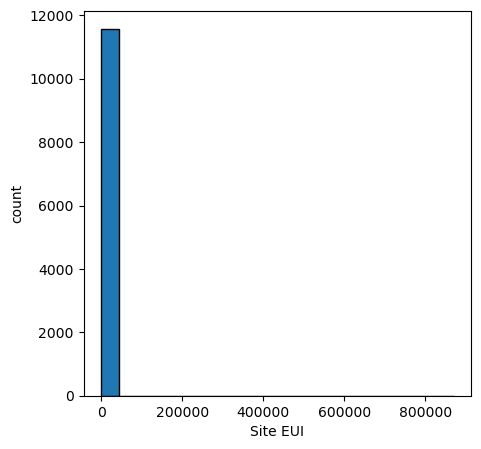

In [289]:
plt.figure(figsize=(5,5))
plt.hist(df["Site EUI (kBtu/ft²)"].dropna(),bins=20,edgecolor ="black");
plt.xlabel('Site EUI')
plt.ylabel('count')

Text(0, 0.5, 'Number of Buildings')

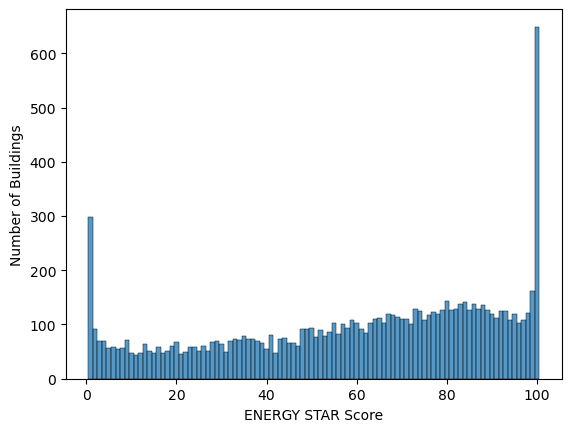

In [290]:
sns.histplot(data=df, x="ENERGY STAR Score", stat="count", discrete=True)
plt.xlabel('ENERGY STAR Score')
plt.ylabel('Number of Buildings')

# Outlier Detection

In [291]:
df.isnull().sum()

Order                                                            0
Property Id                                                      0
Property Name                                                    0
Parent Property Id                                               0
Parent Property Name                                             0
BBL - 10 digits                                                 11
NYC Borough, Block and Lot (BBL) self-reported                  11
NYC Building Identification Number (BIN)                       162
Address 1 (self-reported)                                        0
Postal Code                                                      0
Street Number                                                  124
Street Name                                                    122
Borough                                                        118
DOF Gross Floor Area                                           118
Primary Property Type - Self Selected                         

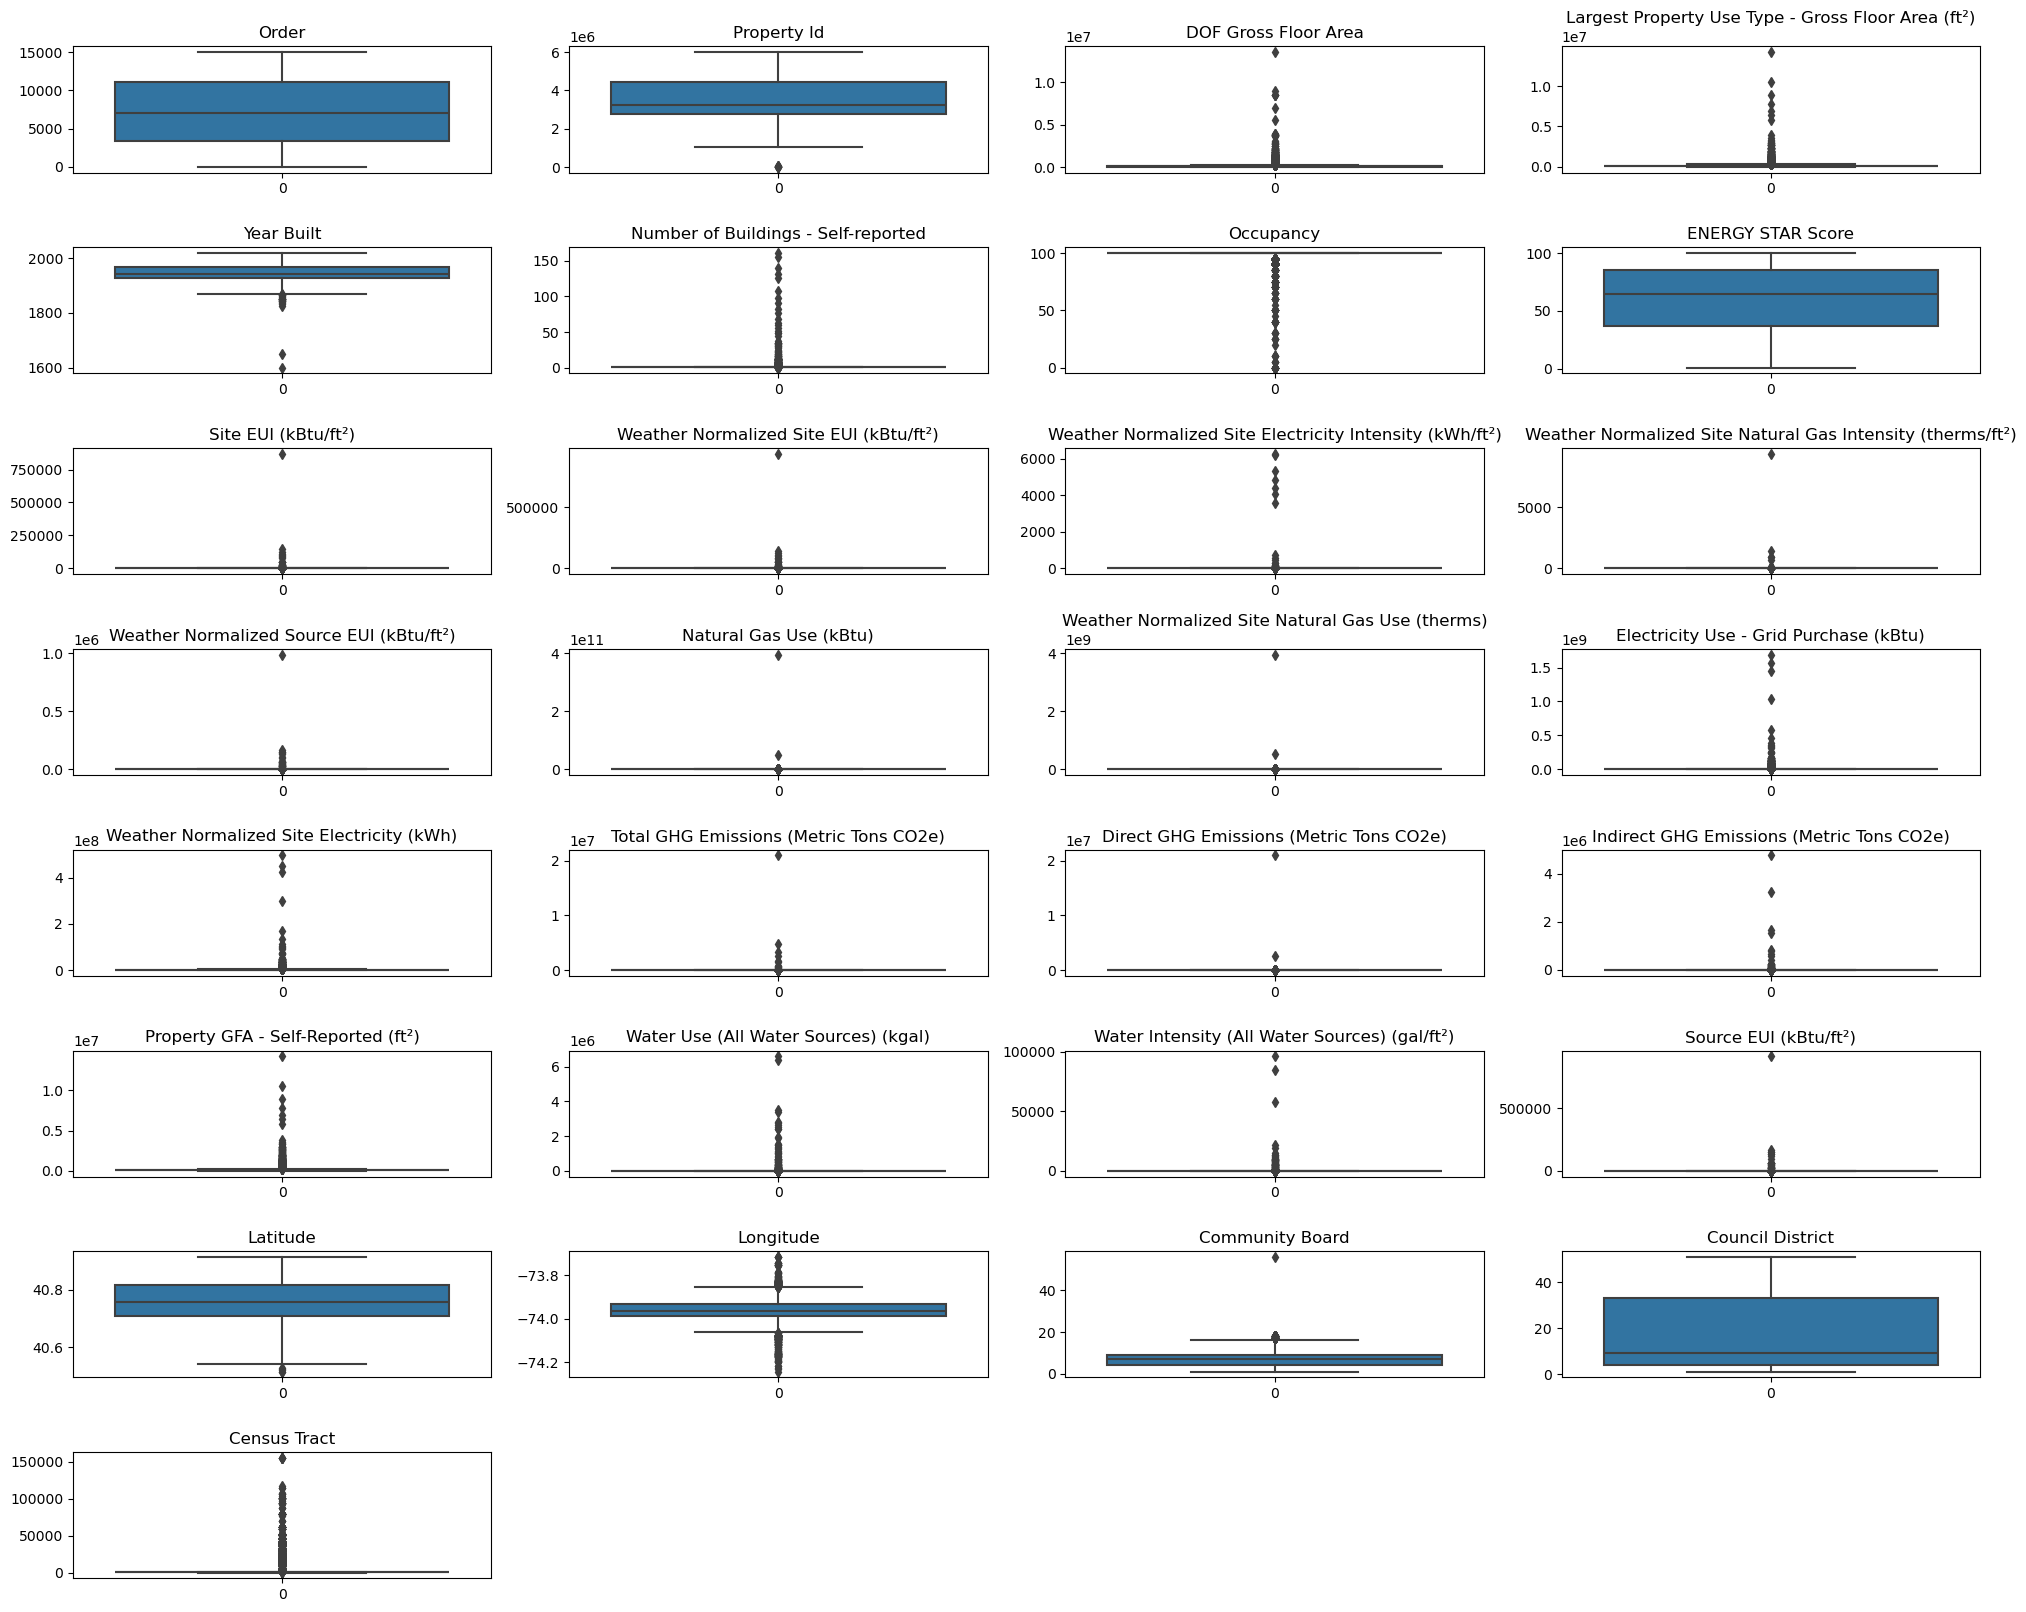

In [292]:
plt.figure(figsize=(20,20))
x=1
for column in df.describe().columns:
    plt.subplot(10,4,x)
    sns.boxplot(df[column])
    plt.title(column)
    x +=1
plt.tight_layout()

In [293]:
first_quartile = df["Site EUI (kBtu/ft²)"].describe()["25%"]
third_quartile = df["Site EUI (kBtu/ft²)"].describe()["75%"]

# IQR Interquartile range
IQR = third_quartile - first_quartile

# Remove outliers
df = df [(df["Site EUI (kBtu/ft²)"] > (first_quartile -3 *IQR)) &
          (df["Site EUI (kBtu/ft²)"] < (third_quartile +3 *IQR))]

Text(0, 0.5, 'count')

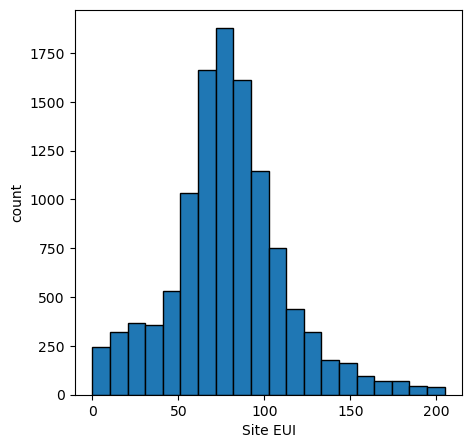

In [294]:
plt.figure(figsize=(5,5))
plt.hist(df["Site EUI (kBtu/ft²)"].dropna(),bins=20,edgecolor ="black");
plt.xlabel('Site EUI')
plt.ylabel('count')

#### after removing outlier from Site EUI (kBtu/ft²) graph changes and evenly distributed graph is created

<Axes: xlabel='Site EUI (kBtu/ft²)', ylabel='ENERGY STAR Score'>

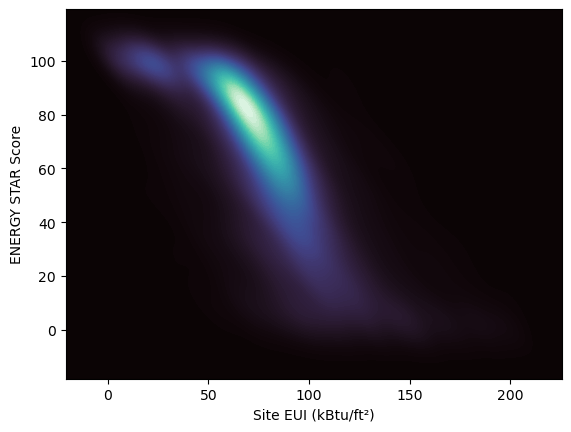

In [295]:
sns.kdeplot(
    data=df, x="Site EUI (kBtu/ft²)", y="ENERGY STAR Score",
    fill=True, thresh=0, levels=100, cmap="mako",
)

In [296]:
# create a list of building with more than 100 measurements
types = df.dropna(subset=["ENERGY STAR Score"])
types = types["Largest Property Use Type"].value_counts()
types = list(types[types.values>100].index)

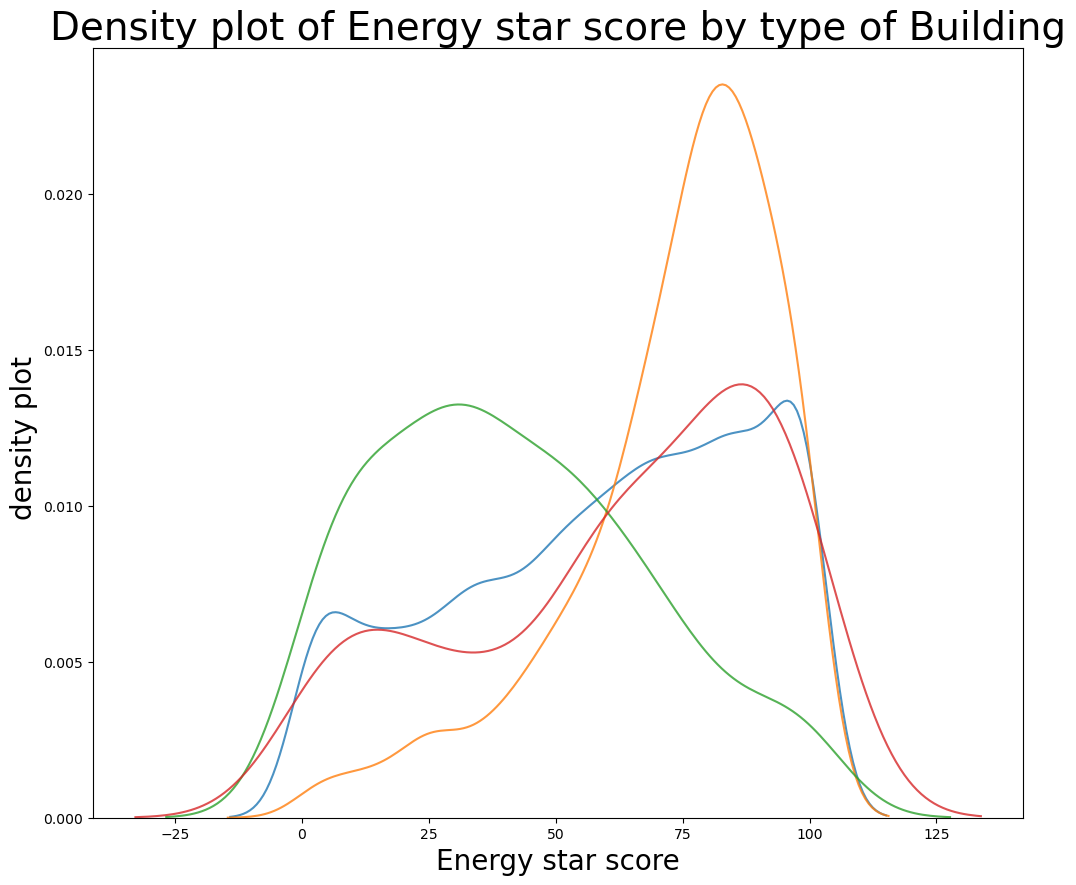

In [297]:
# plot for distribution of scores for building categories
plt.figure(figsize=(12,10))

# plot for each building
for b_type in types:
    subset = df[df["Largest Property Use Type"] == b_type]

#Density plot for Energy star scores
    sns.kdeplot(subset["ENERGY STAR Score"].dropna(), label=b_type , shade=False , alpha=0.8);
plt.xlabel("Energy star score",size=20);
plt.ylabel("density plot ",size=20);
plt.title("Density plot of Energy star score by type of Building",size=28);


In [298]:
# create a list of building with more than 100 measurements
Borough = df.dropna(subset=["ENERGY STAR Score"])
Borough = Borough["Borough"].value_counts()
Borough = list(Borough[Borough.values>100].index)

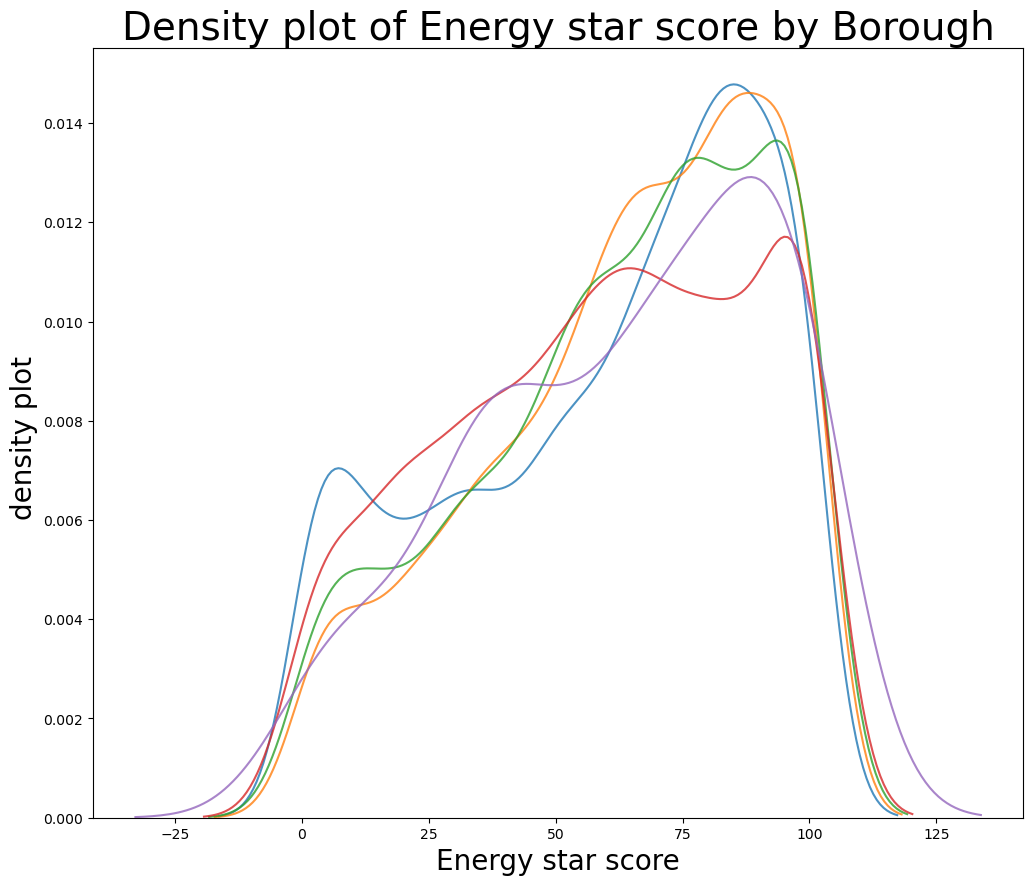

In [299]:
# plot for distribution of scores for building categories
plt.figure(figsize=(12,10))

# plot for each building
for borough in Borough:
    subset = df[df["Borough"] == borough]

#Density plot for Energy star scores
    sns.kdeplot(subset["ENERGY STAR Score"].dropna(), label=borough,shade=False , alpha=0.8);
    
plt.xlabel("Energy star score",size=20);
plt.ylabel("density plot ",size=20);
plt.title("Density plot of Energy star score by Borough",size=28);


#### Select Numeric columns and Categorical columns

In [300]:
# select numeric columns
numeric_subset = df.select_dtypes("number")

# create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    #skip the energy star score column
    if col == "ENERGY STAR Score":
        continue
    else:
        numeric_subset["sqrt_" + col]=np.sqrt(numeric_subset[col])
        numeric_subset["log" + col]=np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = df[["Borough","Largest Property Use Type"]]

#one hot encode
categorical_subset = pd.get_dummies(categorical_subset)

#join two dataframe using concat
features = pd.concat([numeric_subset,categorical_subset],axis=1)

#Drop building without any energy star score
features=features.dropna(subset=["ENERGY STAR Score"])




In [301]:
features.shape

(9461, 138)

In [302]:
#Find correlations with score
correlations = features.corr()["ENERGY STAR Score"].dropna().sort_values()

In [303]:
#print the most negative correlations
correlations.head(15)

Site EUI (kBtu/ft²)                                            -0.723864
Weather Normalized Site EUI (kBtu/ft²)                         -0.713993
sqrt_Site EUI (kBtu/ft²)                                       -0.699817
sqrt_Weather Normalized Site EUI (kBtu/ft²)                    -0.689019
sqrt_Weather Normalized Source EUI (kBtu/ft²)                  -0.671044
sqrt_Source EUI (kBtu/ft²)                                     -0.669396
Weather Normalized Source EUI (kBtu/ft²)                       -0.645542
Source EUI (kBtu/ft²)                                          -0.641037
logSource EUI (kBtu/ft²)                                       -0.622892
logWeather Normalized Source EUI (kBtu/ft²)                    -0.620329
logSite EUI (kBtu/ft²)                                         -0.612039
logWeather Normalized Site EUI (kBtu/ft²)                      -0.601332
logWeather Normalized Site Electricity Intensity (kWh/ft²)     -0.424246
sqrt_Weather Normalized Site Electricity Intensity 

In [304]:
#print the most positive correlations
correlations.tail(15)

sqrt_Order                                                         0.028662
Borough_Queens                                                     0.029545
Largest Property Use Type_Supermarket/Grocery Store                0.030038
Largest Property Use Type_Residence Hall/Dormitory                 0.035407
Order                                                              0.036827
Largest Property Use Type_Hospital (General Medical & Surgical)    0.048410
Borough_Brooklyn                                                   0.050486
logCommunity Board                                                 0.055495
Community Board                                                    0.056612
sqrt_Community Board                                               0.058029
sqrt_Council District                                              0.060623
logCouncil District                                                0.061101
Council District                                                   0.061639
Largest Prop

<Axes: xlabel='Site EUI (kBtu/ft²)', ylabel='ENERGY STAR Score'>

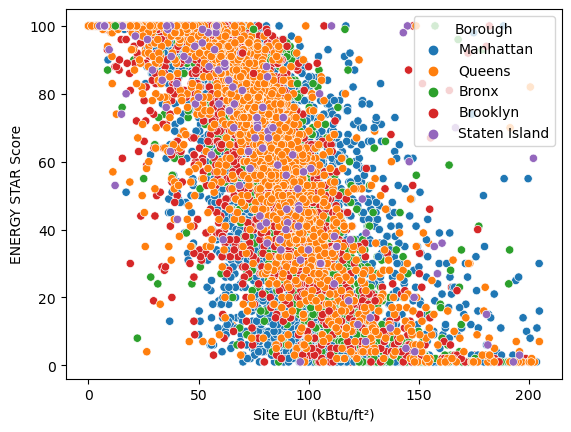

In [305]:
sns.scatterplot(data=df, x="Site EUI (kBtu/ft²)", y="ENERGY STAR Score", hue="Borough")

<Axes: xlabel='Site EUI (kBtu/ft²)', ylabel='ENERGY STAR Score'>

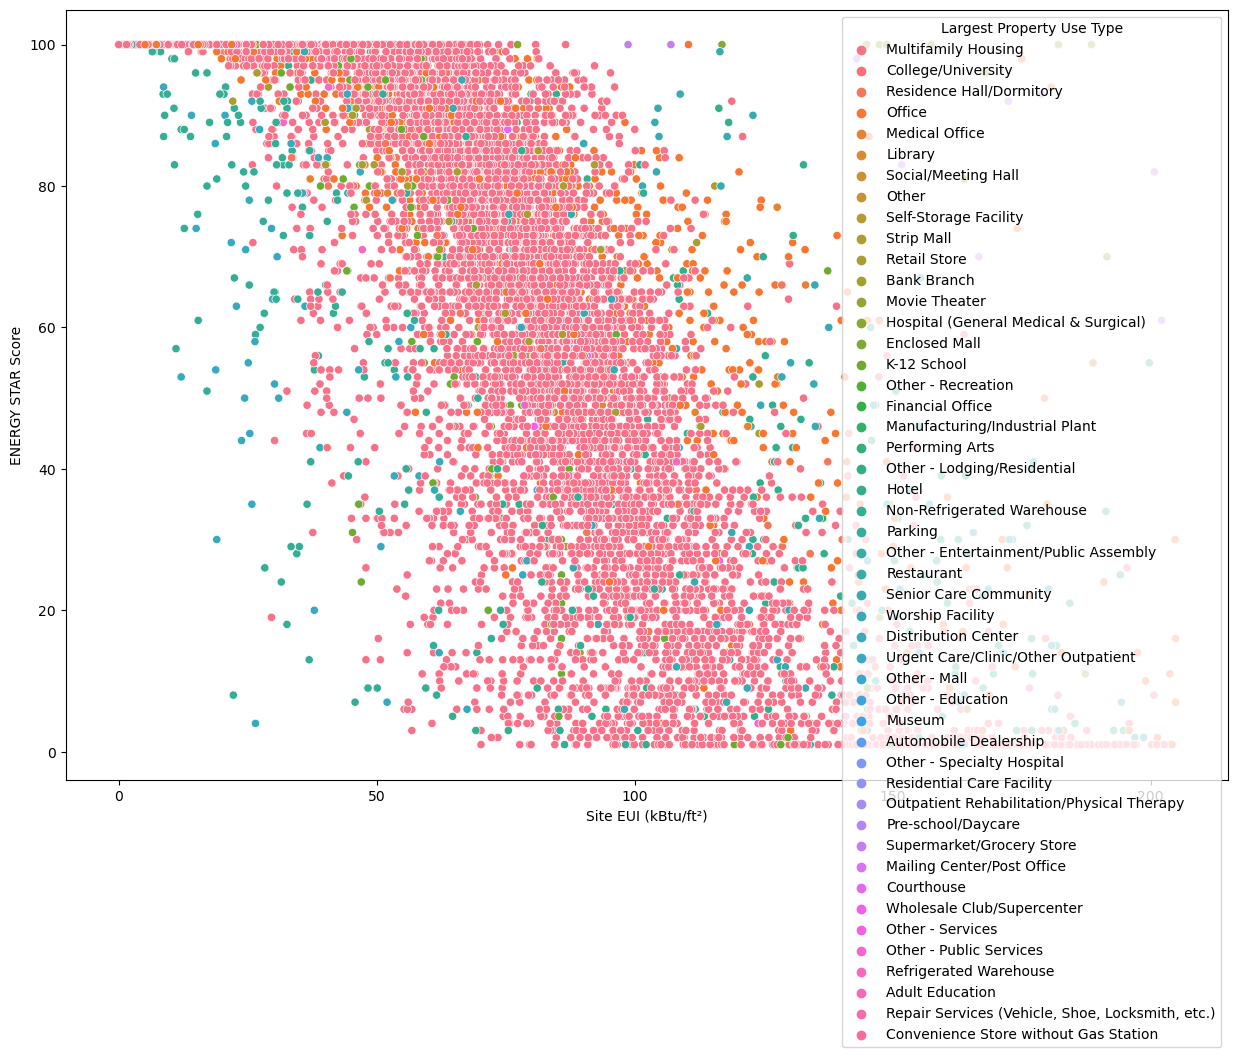

In [306]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x="Site EUI (kBtu/ft²)", y="ENERGY STAR Score", hue="Largest Property Use Type")

<Axes: xlabel='Site EUI (kBtu/ft²)', ylabel='ENERGY STAR Score'>

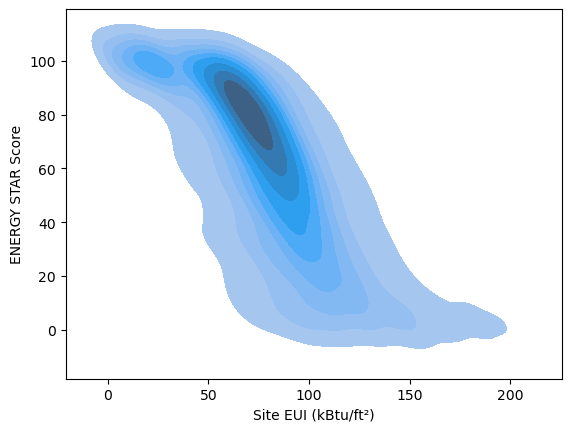

In [307]:
# Density vise representation
sns.kdeplot(
    data=df, x="Site EUI (kBtu/ft²)", y="ENERGY STAR Score", fill=True,
)

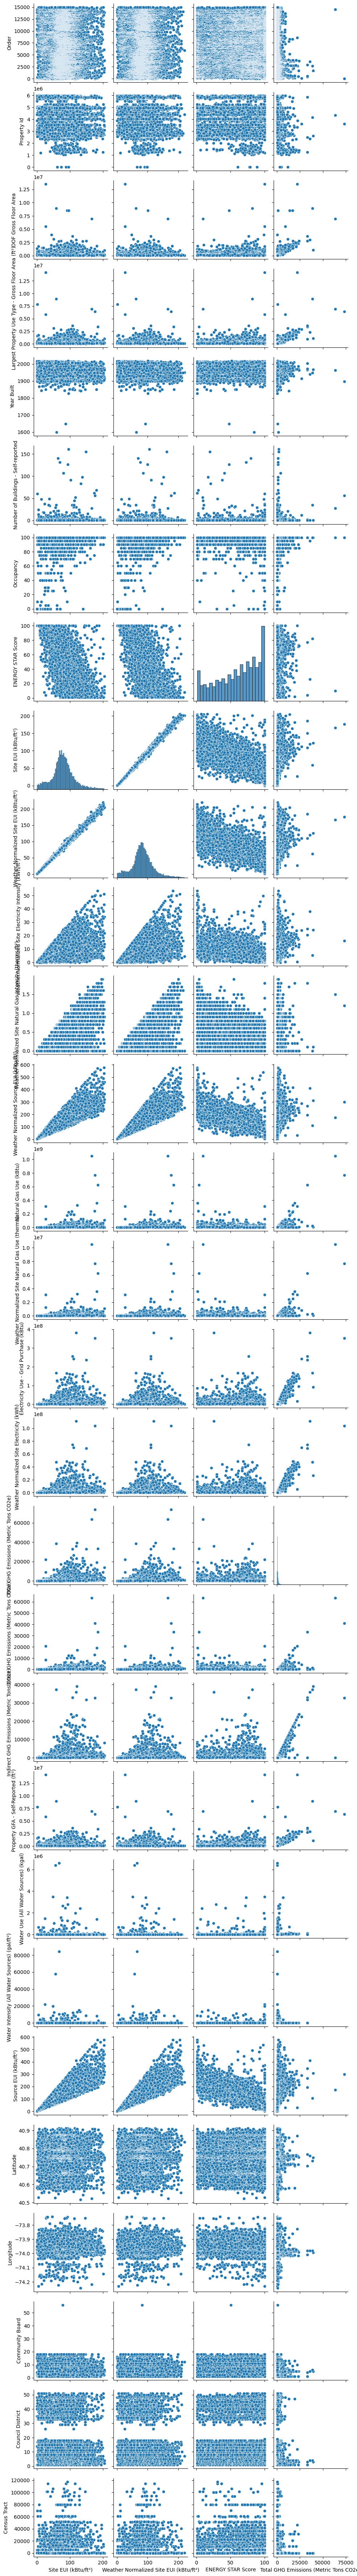

In [308]:
sns.pairplot(
    df,
    x_vars=["Site EUI (kBtu/ft²)", "Weather Normalized Site EUI (kBtu/ft²)", "ENERGY STAR Score","Total GHG Emissions (Metric Tons CO2e)"],
    #y_vars=["bill_length_mm", "bill_depth_mm"],
)

In [1]:
#sns.pairplot(df)

In [235]:
df.describe()

Order   Property Id  DOF Gross Floor Area  \
count  11299.000000  1.129900e+04          1.121800e+04   
mean    7241.986459  3.638483e+06          1.652832e+05   
std     4272.670480  1.042416e+06          3.088145e+05   
min       15.000000  7.365000e+03          5.002800e+04   
25%     3519.500000  2.745639e+06          6.505200e+04   
50%     7047.000000  3.211729e+06          9.240250e+04   
75%    11058.500000  4.408626e+06          1.568358e+05   
max    14993.000000  5.991312e+06          1.354011e+07   

       Largest Property Use Type - Gross Floor Area (ft²)    Year Built  \
count                                       1.129900e+04   11299.000000   
mean                                        1.571315e+05    1948.525533   
std                                         2.870304e+05      30.521318   
min                                         3.800000e+03    1600.000000   
25%                                         6.534950e+04    1927.000000   
50%                                         9.119300e+04    1940.000000   
75%                                         1.522270e+05    1965.000000   
max                                         1.421712e+07    2019.000000   

       Number of Buildings - Self-reported     Occupancy  ENERGY STAR Score  \
count                         11299.000000  11299.000000        9444.000000   
mean                              1.281441     98.791043          60.828780   
std                               4.009625      7.364974          29.351038   
min                               0.000000      0.000000           1.000000   
25%                               1.000000    100.000000          38.000000   
50%                               1.000000    100.000000          66.000000   
75%                               1.000000    100.000000          86.000000   
max                             161.000000    100.000000         100.000000   

       Site EUI (kBtu/ft²)  Weather Normalized Site EUI (kBtu/ft²)  ...  \
count         11299.000000                            10034.000000  ...   
mean             78.868811                               82.639326  ...   
std              32.942520                               34.140740  ...   
min               0.000000                                0.000000  ...   
25%              61.200000                               64.700000  ...   
50%              77.700000                               81.700000  ...   
75%              95.750000                              100.700000  ...   
max             199.300000                              211.700000  ...   

       Indirect GHG Emissions (Metric Tons CO2e)  \
count                               11288.000000   
mean                                  538.362199   
std                                  1583.793084   
min                                     0.000000   
25%                                    95.400000   
50%                                   170.100000   
75%                                   408.575000   
max                                 39082.500000   

       Property GFA - Self-Reported (ft²)  \
count                        1.129900e+04   
mean                         1.637737e+05   
std                          2.966865e+05   
min                          0.000000e+00   
25%                          6.700450e+04   
50%                          9.399300e+04   
75%                          1.575000e+05   
max                          1.421712e+07   

       Water Use (All Water Sources) (kgal)  \
count                          7.564000e+03   
mean                           1.488901e+04   
std                            1.469183e+05   
min                            0.000000e+00   
25%                            2.591950e+03   
50%                            4.666050e+03   
75%                            7.942850e+03   
max                            6.594604e+06   

       Water Intensity (All Water Sources) (gal/ft²)  Source EUI (kBtu/ft²)  \
count                                   

In [309]:
df.describe(include="object").T

count unique  \
Property Name                                   11319  11315   
Parent Property Id                              11319     94   
Parent Property Name                            11319     95   
BBL - 10 digits                                 11310  11227   
NYC Borough, Block and Lot (BBL) self-reported  11310  11227   
NYC Building Identification Number (BIN)        11173  11124   
Address 1 (self-reported)                       11319  11244   
Postal Code                                     11319    278   
Street Number                                   11232   4113   
Street Name                                     11234   1993   
Borough                                         11237      5   
Primary Property Type - Self Selected           11319     50   
List of All Property Use Types at Property      11319    779   
Largest Property Use Type                       11319     48   
Metered Areas (Energy)                          11315      6   
Metered Areas  (Water)                           6940      6   
Release Date                                    11319   3441   
Water Required?                                 11221      2   
DOF Benchmarking Submission Status              11291      1   
NTA                                              9184    143   

                                                                                              top  \
Property Name                                                                 Jetro Cash && Carry   
Parent Property Id                                            Not Applicable: Standalone Property   
Parent Property Name                                          Not Applicable: Standalone Property   
BBL - 10 digits                                                                        4067920600   
NYC Borough, Block and Lot (BBL) self-reported                                       4-06792-0600   
NYC Building Identification Number (BIN)                                                  4455438   
Address 1 (self-reported)                                                   410 West 118th Street   
Postal Code                                                                                 10022   
Street Number                                                                                   1   
Street Name                                                                              BROADWAY   
Borough                                                                                 Manhattan   
Primary Property Type - Self Selected                                         Multifamily Housing   
List of All Property Use Types at Property                                    Multifamily Housing   
Largest Property Use Type                                                     Multifamily Housing   
Metered Areas (Energy)                                                             Whole Building   
Metered Areas  (Water)                                                             Whole Building   
Release Date                                                               05/01/2017 02:58:14 PM   
Water Required?                                                                               Yes   
DOF Benchmarking Submission Status                                                  In Compliance   
NTA                                             Midtown-Midtown South                         ...   

                                                 freq  
Property Name                                       2  
Parent Property Id                              11023  
Parent Property Name                            11023  
BBL - 10 digits                                    12  
NYC Borough, Block and Lot (BBL) self-reported     12  
NYC Building Identification Number (BIN)           12  
Address 1 (self-reported)                          12  
Postal Code                                       260  
Street Number                                      65  
Street Name          

# Feature Engineering and selection

In [310]:
df.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Natural Gas Use (kBtu)',
       'Weather Nor

In [311]:
df.stb.freq(["ENERGY STAR Score"],cum_cols=False)

ENERGY STAR Score  count   percent
0               100.0    648  6.849170
1                 1.0    188  1.987105
2                99.0    162  1.712293
3                80.0    143  1.511468
4                84.0    142  1.500898
5                86.0    138  1.458620
6                83.0    138  1.458620
7                88.0    136  1.437480
8                87.0    128  1.352923
9                82.0    128  1.352923
10               73.0    128  1.352923
11               89.0    127  1.342353
12               81.0    126  1.331783
13               93.0    125  1.321213
14               85.0    125  1.321213
15               79.0    125  1.321213
16               92.0    124  1.310644
17               74.0    124  1.310644
18               98.0    122  1.289504
19               77.0    122  1.289504
20               90.0    120  1.268365
21               95.0    119  1.257795
22               78.0    119  1.257795
23               67.0    119  1.257795
24               76.0    118  1.247225
25               68.0    118  1.247225
26               69.0    114  1.204947
27               91.0    112  1.183807
28               65.0    111  1.173238
29               71.0    110  1.162668
30               97.0    109  1.152098
31               70.0    109  1.152098
32               64.0    109  1.152098
33               94.0    108  1.141528
34               75.0    108  1.141528
35               59.0    108  1.141528
36               96.0    102  1.078110
37               60.0    102  1.078110
38               66.0    101  1.067540
39               63.0    101  1.067540
40               72.0    100  1.056971
41               57.0    100  1.056971
42               55.0    100  1.056971
43               61.0     92  0.972413
44               50.0     91  0.961843
45               49.0     91  0.961843
46               48.0     91  0.961843
47               58.0     90  0.951274
48               52.0     89  0.940704
49               54.0     87  0.919565
50                2.0     85  0.898425
51               62.0     84  0.887855
52               56.0     83  0.877286
53               41.0     80  0.845577
54               35.0     78  0.824437
55               53.0     77  0.813867
56               51.0     76  0.803298
57               44.0     75  0.792728
58               43.0     74  0.782158
59               33.0     73  0.771589
60               37.0     72  0.761019
61                9.0     72  0.761019
62               36.0     71  0.750449
63               34.0     71  0.750449
64               29.0     70  0.739880
65               32.0     69  0.729310
66                4.0     69  0.729310
67               38.0     68  0.718740
68               20.0     67  0.708170
69               46.0     66  0.697601
70               45.0     66  0.697601
71               39.0     66  0.697601
72               28.0     66  0.697601
73                3.0     66  0.697601
74               30.0     64  0.676461
75               13.0     63  0.665892
76               47.0     60  0.634182
77               26.0     59  0.623613
78               24.0     58  0.613043
79               23.0     58  0.613043
80               19.0     58  0.613043
81               16.0     57  0.602473
82                6.0     57  0.602473
83                8.0     55  0.581334
84               40.0     53  0.560194
85                5.0     53  0.560194
86               18.0     52  0.549625
87               27.0     51  0.539055
88               25.0     51  0.539055
89               31.0     50  0.528485
90               14.0     50  0.528485
91                7.0     50  0.528485
92               22.0     48  0.507346
93               17.0     48  0.507346
94               42.0     47  0.496776
95               10.0     47  0.496776
96               15.0     46  0.486207
97               12.0     46  0.486207
98               21.0     45  0.475637
99               11.0     44  0.465067

In [312]:
#df.stb.freq(["Order"],cum_cols=False)

In [313]:
#df.stb.freq(["Site EUI (kBtu/ft²)"],cum_cols=False)

In [314]:
# 75 % Multifamily Housing and rest all

In [315]:
df.stb.freq(["Largest Property Use Type"],cum_cols=False)

Largest Property Use Type  count    percent
0                                Multifamily Housing   8535  75.404188
1                                             Office   1286  11.361428
2                                              Hotel    211   1.864122
3                         Non-Refrigerated Warehouse    198   1.749271
4                                              Other    133   1.175015
5                           Residence Hall/Dormitory    103   0.909974
6                                        K-12 School    101   0.892305
7                              Self-Storage Facility     95   0.839297
8                              Senior Care Community     89   0.786289
9                                       Retail Store     85   0.750950
10                                College/University     83   0.733280
11                               Distribution Center     67   0.591925
12                                           Parking     49   0.432900
13                    Manufacturing/Industrial Plant     45   0.397562
14                                    Medical Office     27   0.238537
15             Other - Entertainment/Public Assembly     19   0.167859
16                                  Worship Facility     18   0.159025
17                         Supermarket/Grocery Store     16   0.141355
18             Hospital (General Medical & Surgical)     16   0.141355
19                                  Financial Office     16   0.141355
20                                      Other - Mall     11   0.097182
21                                 Other - Education     10   0.088347
22                                        Strip Mall      8   0.070678
23                            Refrigerated Warehouse      8   0.070678
24                                   Performing Arts      8   0.070678
25                               Social/Meeting Hall      7   0.061843
26                        Other - Specialty Hospital      7   0.061843
27                       Other - Lodging/Residential      7   0.061843
28                                     Enclosed Mall      7   0.061843
29               Urgent Care/Clinic/Other Outpatient      6   0.053008
30                         Residential Care Facility      5   0.044174
31                        Wholesale Club/Supercenter      4   0.035339
32  Repair Services (Vehicle, Shoe, Locksmith, etc.)      4   0.035339
33                                            Museum      4   0.035339
34                                     Movie Theater      4   0.035339
35                             Automobile Dealership      4   0.035339
36        Outpatient Rehabilitation/Physical Therapy      3   0.026504
37                                Other - Recreation      3   0.026504
38                                           Library      3   0.026504
39                                   Adult Education      3   0.026504
40                                  Other - Services      2   0.017669
41                           Other - Public Services      2   0.017669
42                                        Courthouse      2   0.017669
43                                        Restaurant      1   0.008835
44                                Pre-school/Daycare      1   0.008835
45                        Mailing Center/Post Office      1   0.008835
46             Convenience Store without Gas Station      1   0.008835
47                                       Bank Branch      1   0.008835

In [316]:
#def property(row):
#   if(row["Multifamily Housing"] == 0):
#       return 0
#    else:
#       return 1
#df["Multifamily_Housing"] = df.apply(property,axis =1)
#df.stb.freq(["Multifamily_Housing"],cum_cols=False)

In [317]:
df.stb.freq(["Borough"],cum_cols=False)

Borough  count    percent
0      Manhattan   5005  44.540358
1       Brooklyn   2207  19.640473
2         Queens   2000  17.798345
3          Bronx   1878  16.712646
4  Staten Island    147   1.308178

In [318]:
#df.stb.freq(["Largest Property Use Type - Gross Floor Area (ft²)"],cum_cols=False)

In [319]:
#df.stb.freq(["List of All Property Use Types at Property"],cum_cols=False)

In [320]:
#df.stb.freq(["ENERGY STAR Score"],cum_cols=False)

In [321]:
#df.stb.freq(["Weather Normalized Site EUI (kBtu/ft²)"],cum_cols=False)

In [322]:
#df.stb.freq(["Weather Normalized Site Electricity Intensity (kWh/ft²)"],cum_cols=False)

In [323]:
#df.stb.freq(["Weather Normalized Site Natural Gas Intensity (therms/ft²)"],cum_cols=False)

In [324]:
#df.stb.freq(["Weather Normalized Site Natural Gas Use (therms)"],cum_cols=False)

### Remove multi-collinearity

Text(0.5, 1.0, 'Site EUI vs Weather Normalized Site EUI')

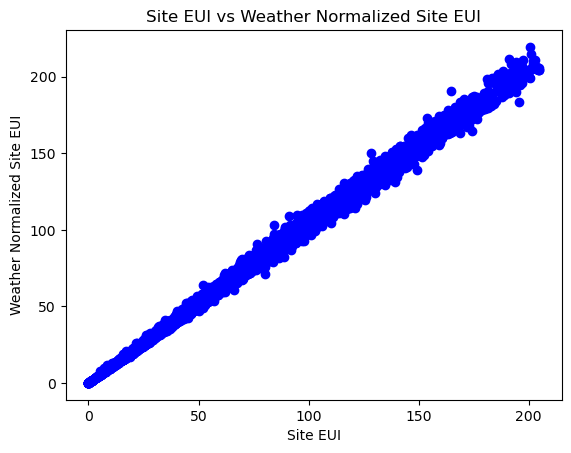

In [325]:
plot_data = df[["Weather Normalized Site EUI (kBtu/ft²)","Site EUI (kBtu/ft²)"]].dropna()
plt.plot(plot_data["Site EUI (kBtu/ft²)"],plot_data["Weather Normalized Site EUI (kBtu/ft²)"],"bo")
plt.xlabel("Site EUI");
plt.ylabel("Weather Normalized Site EUI")
plt.title("Site EUI vs Weather Normalized Site EUI")

In [326]:
def remove_collinear_features(x,threshold):
    y =x["ENERGY STAR Score"]
    x = x.drop(columns=["ENERGY STAR Score"])
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) -1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1),(i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

    # If correlation exceeds the threshold 
            if val >= threshold:
        # print the correlated features and correlation value
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlation columns
    drops = set (drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ["Weather Normalized Site EUI (kBtu/ft²)",
                          "Water Use (All Water Sources) (kgal)",
                          "Largest Property Use Type - Gross Floor Area (ft²)",
                          "Water Use (All Water Sources) (kgal)"])

# Add the score back in to the data
    x["ENERGY STAR Score"] = y

    return x

In [327]:
# Remove the collinear features above a specified correlation coefficient 
features = remove_collinear_features(features,0.6);

In [328]:
# Remove any column with all na values
features = features.dropna(axis=1,how="all")
features.shape

(9461, 67)

#### Multi collinearty = there should be No relationship between input features all input columns should be independent of eachother i.e there should be No multicollinearity

#### Variance Inflation factor = used in regression

In [329]:
# VIF = 1 variables are not correalted 
# VIF between 1 and 5 = variables are moderately correlated
# VIF greater than 5 = avriables are highly correlated

# Separate train and test features

In [330]:
# Extract the buildings with no score and buildings with a score
no_score = features[features["ENERGY STAR Score"].isna()]
score = features[features["ENERGY STAR Score"].notnull()]

print(no_score.shape)
print(score.shape)

(0, 67)
(9461, 67)


In [331]:
# separate  out the features and target
features = score.drop(columns="ENERGY STAR Score")
target = pd.DataFrame(score["ENERGY STAR Score"])

# Replace the inf and -inf with nan 
features = features.replace({np.inf:np.nan,-np.inf:np.nan})

# Split into the 70% training and 30% testing set
X,X_test,y,y_test = train_test_split(features,target,test_size=0.3,random_state=42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)


(6622, 66)
(2839, 66)
(6622, 1)
(2839, 1)


In [344]:
# Function to calculate mean absolute error
def mae(y_true,y_pred):
    return np.mean(abs(y_true-y_pred))

In [347]:
baseline_guess = np.median(y)

print("Baseline guess:",baseline_guess)


Baseline guess: 66.0


In [348]:
print("Baseline performance on test set:",mae(y_test,baseline_guess))

Baseline performance on test set: 24.516379006692496


# Save the notebook

In [350]:
no_score.to_csv("no_score.csv",index=False)
X.to_csv("training_features.csv",index=False)
X_test.to_csv("testing_features.csv",index=False)
y.to_csv("training_labels.csv",index=False)
y_test.to_csv("testing_labels.csv",index=False)